## Importing libraries

In [1]:
pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 1. Load Data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.25.2', '1.5.3', '0.12.2', '3.7.2')

In [5]:
import pandas as pd
df = pd.read_csv('Cars.csv')
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# Check the shape of my data
df.shape

(8128, 13)

In [7]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
# Check Dtypes of my input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [9]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [10]:
df_copy = df.copy() # Save dataframe

In [11]:
#Name cut to appear only car brand name
df_copy['Car_Name'] = df_copy['name'].str.split(" ").str[0]
df_copy.drop(['name'], axis=1, inplace=True)
df_copy.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Car_Name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [12]:
df_copy.drop(['torque'], axis = 1, inplace = True)
df_copy.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_Name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,Maruti


In [13]:
#Split value and unit of mileage, engine and max power
df_copy[["Mileage_Value","Mileage_Unit"]] = df_copy["mileage"].str.split(pat=' ', expand = True)
df_copy[["Engine_Value","Engine_Unit"]] = df_copy["engine"].str.split(pat=' ', expand = True)
df_copy[["Max_Power_Value","Max_Power_Unit"]] = df_copy["max_power"].str.split(pat=' ', expand = True)
df_copy.drop(["mileage","engine","max_power"], axis=1, inplace=True)
df_copy.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Car_Name,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,23.4,kmpl,1248,CC,74,bhp
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,21.14,kmpl,1498,CC,103.52,bhp
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17.7,kmpl,1497,CC,78,bhp
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,23.0,kmpl,1396,CC,90,bhp
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16.1,kmpl,1298,CC,88.2,bhp


In [14]:
#Re Arrange column
new_order = [
    'Car_Name', 'year', 'selling_price', 'km_driven', 'fuel', 
    'seller_type', 'transmission', 'owner', 'seats',
    'Mileage_Value', 'Mileage_Unit', 'Engine_Value', 'Engine_Unit',
    'Max_Power_Value', 'Max_Power_Unit'
]
new_df = df_copy[new_order]
new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.4,kmpl,1248,CC,74,bhp
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.7,kmpl,1497,CC,78,bhp
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.0,kmpl,1396,CC,90,bhp
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.1,kmpl,1298,CC,88.2,bhp


In [15]:
#Remove car fuel CNG and LPG to remove a car which use different mileage system
new_df = new_df[new_df['fuel'].isin(['Diesel', 'Petrol'])]
new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.4,kmpl,1248,CC,74,bhp
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.7,kmpl,1497,CC,78,bhp
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.0,kmpl,1396,CC,90,bhp
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.1,kmpl,1298,CC,88.2,bhp


In [16]:
# convert values of mileage into float
new_df['mileage'] = df['mileage'].str.split().str[0].astype(float)

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.4,kmpl,1248,CC,74,bhp,23.40
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp,21.14
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.7,kmpl,1497,CC,78,bhp,17.70
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.0,kmpl,1396,CC,90,bhp,23.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.1,kmpl,1298,CC,88.2,bhp,16.10


In [17]:
# convert values of mileage into float
new_df['Mileage_Value'] = df['mileage'].str.split().str[0].astype(float)

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248,CC,74,bhp,23.40
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp,21.14
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497,CC,78,bhp,17.70
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396,CC,90,bhp,23.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298,CC,88.2,bhp,16.10


In [18]:
# convert values of engine into float
new_df['engine'] = df['engine'].str.split().str[0].astype('float64')

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage,engine
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248,CC,74,bhp,23.40,1248.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp,21.14,1498.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497,CC,78,bhp,17.70,1497.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396,CC,90,bhp,23.00,1396.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298,CC,88.2,bhp,16.10,1298.0


In [19]:
# convert values of engine into float
new_df['Engine_Value'] = df['engine'].str.split().str[0].astype('float64')

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage,engine
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248.0,CC,74,bhp,23.40,1248.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498.0,CC,103.52,bhp,21.14,1498.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497.0,CC,78,bhp,17.70,1497.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396.0,CC,90,bhp,23.00,1396.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298.0,CC,88.2,bhp,16.10,1298.0


In [20]:
# convert values of engine into float
new_df['Max_Power_Value'] = new_df['Max_Power_Value'].str.split().str[0].astype('float64')

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage,engine
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248.0,CC,74.00,bhp,23.40,1248.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498.0,CC,103.52,bhp,21.14,1498.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497.0,CC,78.00,bhp,17.70,1497.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396.0,CC,90.00,bhp,23.00,1396.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298.0,CC,88.20,bhp,16.10,1298.0


In [21]:
# Arrange the columns
new_df = new_df.reindex(columns = ['Car_Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner', 'seats', 'Mileage_Value', 'Engine_Value', 'Max_Power_Value'])

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1248.0,74.00
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498.0,103.52
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1497.0,78.00
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1396.0,90.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1298.0,88.20


In [22]:
# Mapping owner feature into ordinal numbers
dict_owner = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4,
            'Test Drive Car':5}
new_df["owner"] = new_df["owner"].map(dict_owner)
#Remove Test Drive Car
new_df = new_df[new_df['owner'] != 'Test Drive Cars']
new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,5.0,23.40,1248.0,74.00
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,5.0,21.14,1498.0,103.52
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,5.0,17.70,1497.0,78.00
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,5.0,23.00,1396.0,90.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,5.0,16.10,1298.0,88.20


In [23]:
# Check the shape of my data
new_df.shape

(8033, 12)

In [24]:
# Statistical info Hint: look up .describe()
new_df.describe()

,year,selling_price,km_driven,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
count,8033.000000,8.033000e+03,8.033000e+03,8033.000000,7819.000000,7819.000000,7819.000000,7825.000000
mean,2013.818748,6.427361e+05,6.973882e+04,1.460227,5.421281,19.390375,1463.090677,91.864733
std,4.031655,8.098635e+05,5.664361e+04,0.720497,0.962876,4.001777,504.655439,35.846839
min,1983.000000,2.999900e+04,1.000000e+03,1.000000,2.000000,0.000000,624.000000,0.000000
25%,2011.000000,2.600000e+05,3.500000e+04,1.000000,5.000000,16.780000,1197.000000,69.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,5.000000,19.300000,1248.000000,82.400000
75%,2017.000000,6.800000e+05,9.800000e+04,2.000000,5.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,5.000000,14.000000,42.000000,3604.000000,400.000000


In [25]:
# Check Dtypes of your input data
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Name         8033 non-null   object 
 1   year             8033 non-null   int64  
 2   selling_price    8033 non-null   int64  
 3   km_driven        8033 non-null   int64  
 4   fuel             8033 non-null   object 
 5   seller_type      8033 non-null   object 
 6   transmission     8033 non-null   object 
 7   owner            8033 non-null   int64  
 8   seats            7819 non-null   float64
 9   Mileage_Value    7819 non-null   float64
 10  Engine_Value     7819 non-null   float64
 11  Max_Power_Value  7825 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.9+ KB


In [26]:
# Check the column names
new_df.columns

Index(['Car_Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'Mileage_Value', 'Engine_Value',
       'Max_Power_Value'],
      dtype='object')

## 2. Exploratory data analysis

### 2.1 Univariate analyis

Single variable exploratory data anlaysis

<Axes: xlabel='fuel', ylabel='count'>

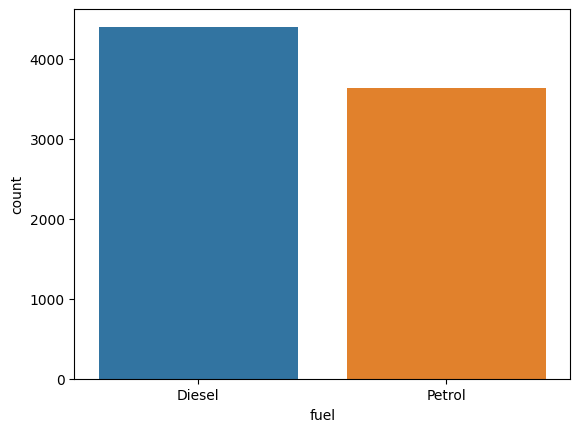

In [27]:
# Create countplot for type of fuel

sns.countplot(data = new_df, x = 'fuel')

<Axes: xlabel='owner', ylabel='count'>

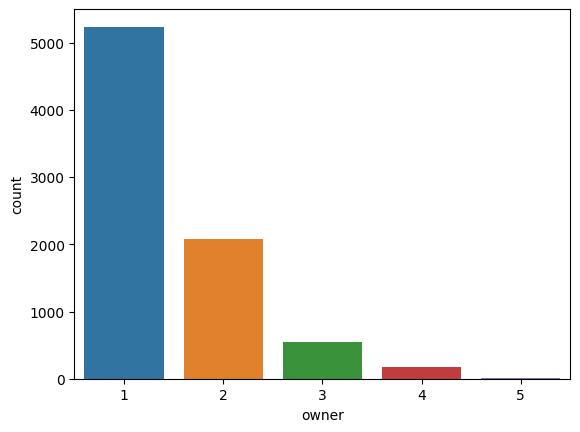

In [28]:
# Create countplot for type of owner

sns.countplot(data = new_df, x = 'owner')

<Axes: xlabel='seats', ylabel='count'>

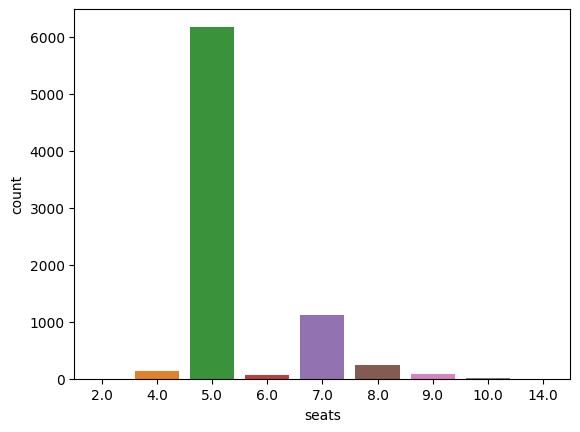

In [29]:
# Create countplot for seats type

sns.countplot(data = new_df, x = 'seats')

<Axes: xlabel='seller_type', ylabel='count'>

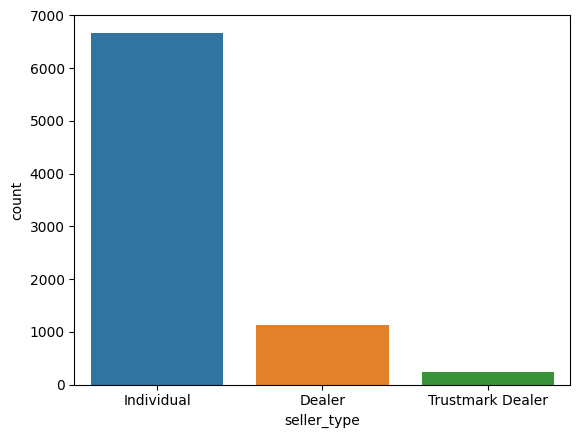

In [30]:
# Create countplot for seller type

sns.countplot(data = new_df, x = 'seller_type')

<Axes: xlabel='transmission', ylabel='count'>

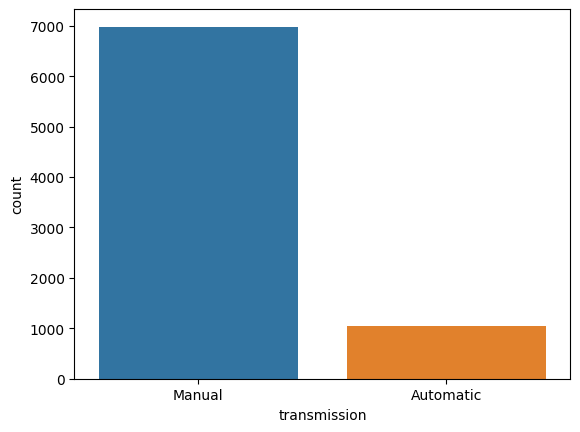

In [31]:
# Create countplot for type of transmission

sns.countplot(data = new_df, x = 'transmission')

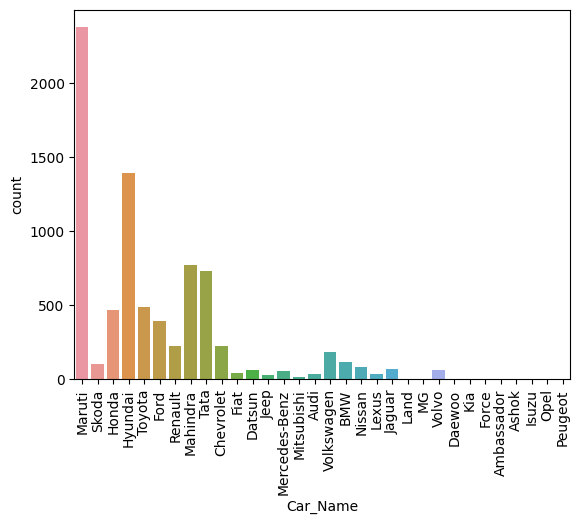

In [32]:
# Create countplot for car brand name

sns.countplot(data = new_df, x = 'Car_Name')
plt.xticks(rotation = 90)
plt.show()

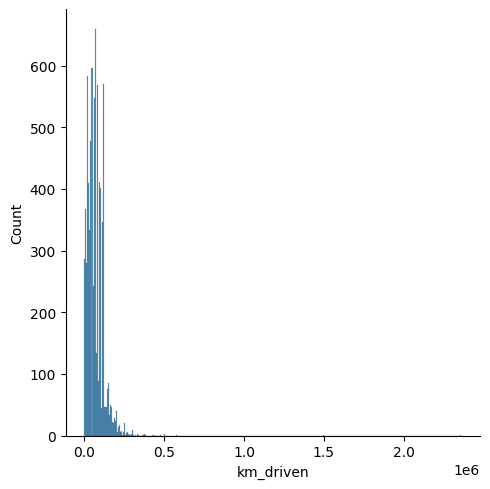

In [33]:
# Distribution plot for for km_driven
sns.displot(x = new_df["km_driven"])

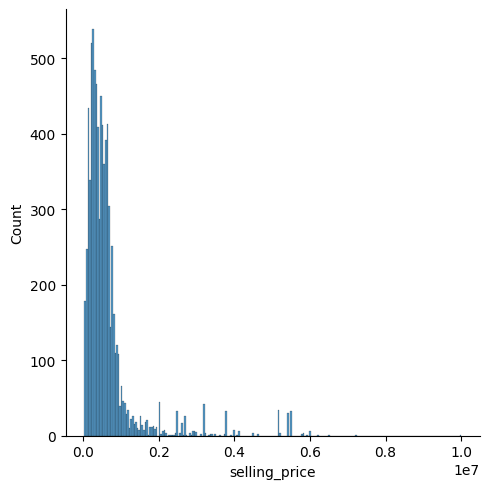

In [34]:
# Distribution plot for for selling price
sns.displot(x = new_df["selling_price"])

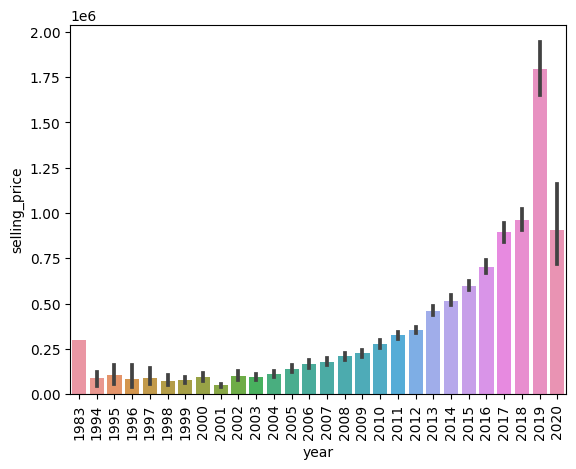

In [35]:
# Bar Chart for seling price in years
sns.barplot(data = new_df, x = "year", y = "selling_price")
plt.xticks(rotation = 90)
plt.show()

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

Text(0.5, 0, 'fuel')

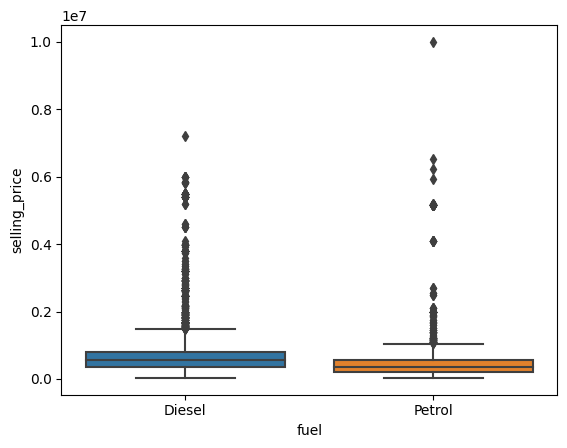

In [36]:
# Create boxplot of selling price of car in each types of fuel
sns.boxplot(x = new_df["fuel"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("fuel")


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Name         8033 non-null   object 
 1   year             8033 non-null   int64  
 2   selling_price    8033 non-null   int64  
 3   km_driven        8033 non-null   int64  
 4   fuel             8033 non-null   object 
 5   seller_type      8033 non-null   object 
 6   transmission     8033 non-null   object 
 7   owner            8033 non-null   int64  
 8   seats            7819 non-null   float64
 9   Mileage_Value    7819 non-null   float64
 10  Engine_Value     7819 non-null   float64
 11  Max_Power_Value  7825 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.9+ KB


Text(0.5, 0, 'seller_type')

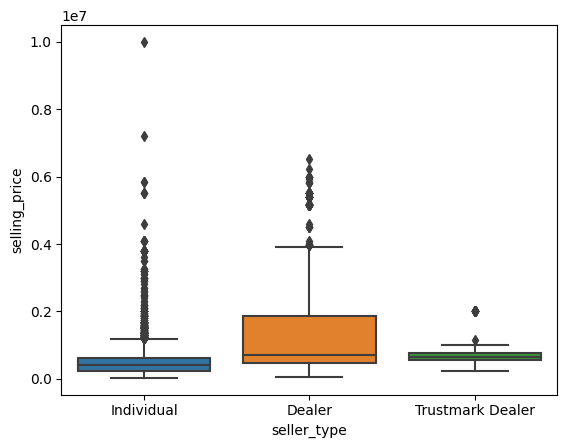

In [38]:
# Create boxplot of selling price of car in each types of seller
sns.boxplot(x = new_df["seller_type"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("seller_type")


Text(0.5, 0, 'transmission')

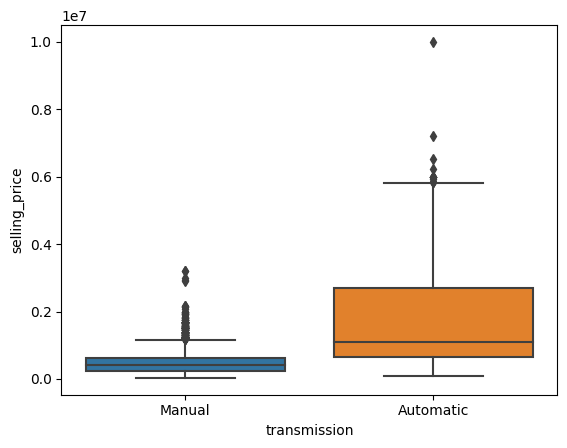

In [39]:
# Create boxplot of selling price of car in each types of transmission
sns.boxplot(x = new_df["transmission"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("transmission")


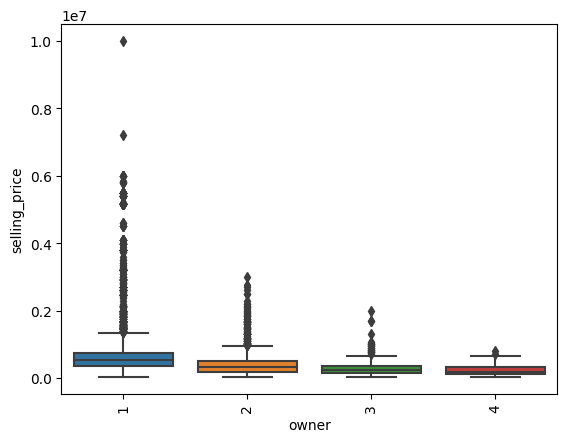

In [40]:
# Create boxplot of selling price of car in each types of owner car
new_df = new_df[new_df["owner"] != 5]
sns.boxplot(x = new_df["owner"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("owner")
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 0, 'seats')

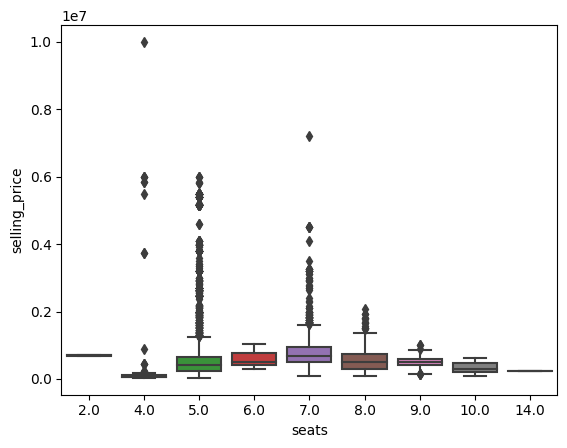

In [41]:
# Create boxplot of selling price of car in each numbers of seats
sns.boxplot(x = new_df["seats"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("seats")

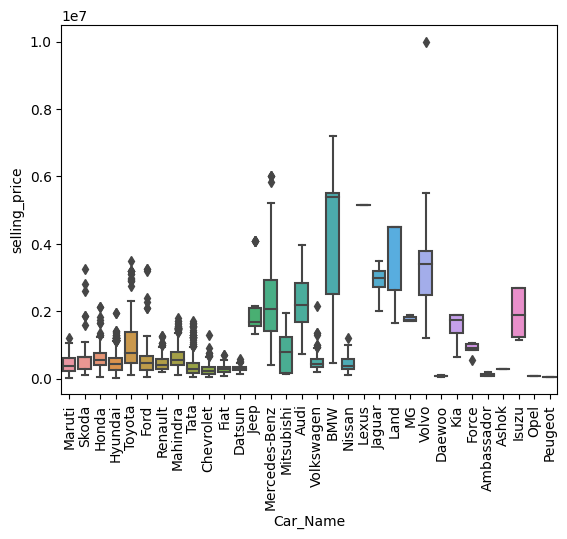

In [42]:
# Create boxplot of selling price of car in each car name
sns.boxplot(x = new_df["Car_Name"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("Car_Name")
plt.xticks(rotation = 90)
plt.show()

In [43]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df["fuel"] = le.fit_transform(new_df["fuel"])
new_df["seller_type"] = le.fit_transform(new_df["seller_type"])
new_df["transmission"] = le.fit_transform(new_df["transmission"])
new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
0,Maruti,2014,450000,145500,0,1,1,1,5.0,23.40,1248.0,74.00
1,Skoda,2014,370000,120000,0,1,1,2,5.0,21.14,1498.0,103.52
2,Honda,2006,158000,140000,1,1,1,3,5.0,17.70,1497.0,78.00
3,Hyundai,2010,225000,127000,0,1,1,1,5.0,23.00,1396.0,90.00
4,Maruti,2007,130000,120000,1,1,1,1,5.0,16.10,1298.0,88.20


<Axes: >

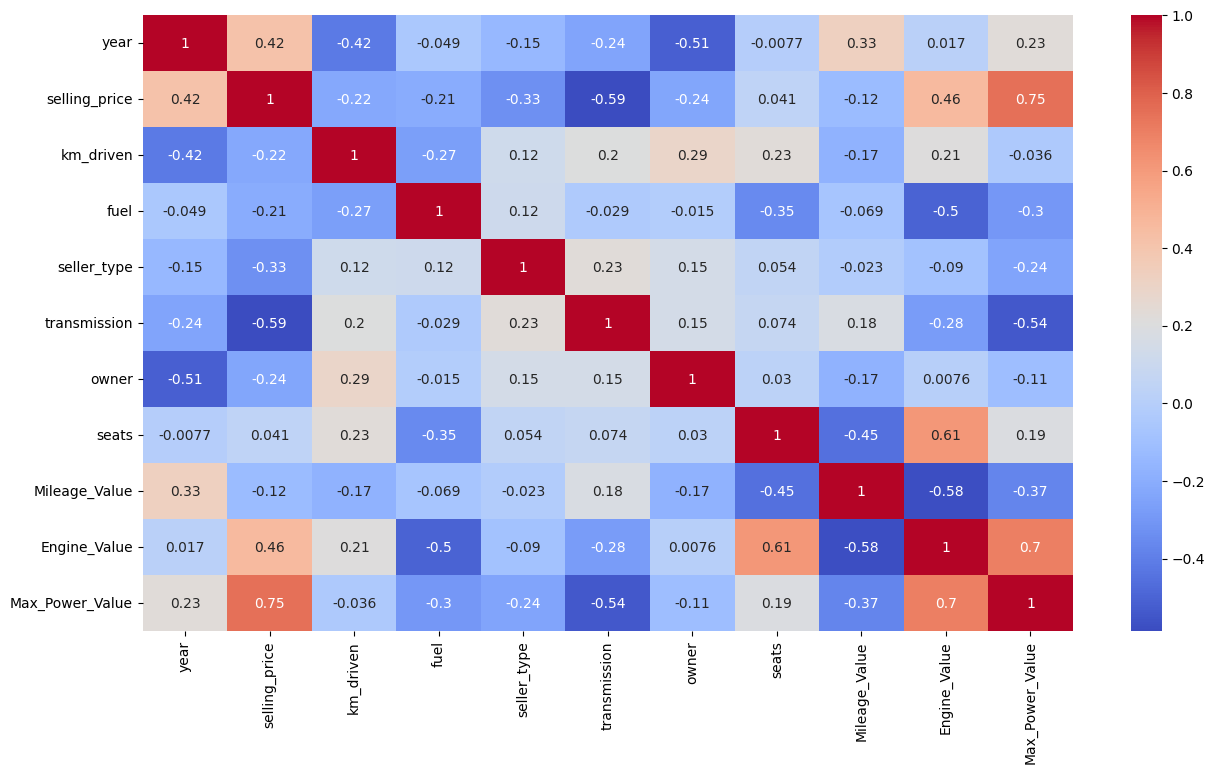

In [44]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

In [45]:
! pip install ppscore


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


<Axes: xlabel='x', ylabel='y'>

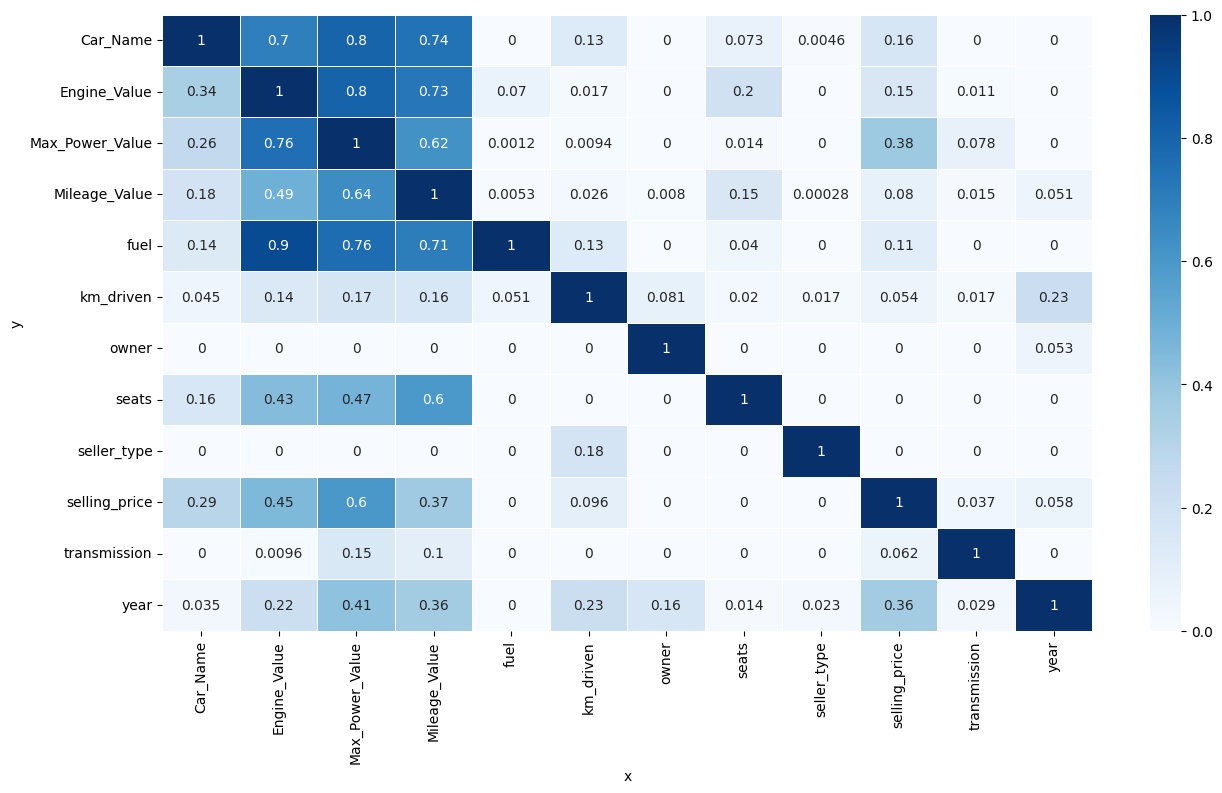

In [46]:
#Use Predictive power score to predict
import ppscore as pps

# before using pps, let's drop car name and year
dfcopy = new_df.copy()
dfcopy.drop(['Car_Name', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(new_df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3 Feature Engineering

From selling_price column is quite hard to see which car has the most expensive and the cheapest which I decide to decending the data in selling_price column.

In [47]:
sorted_new_df = new_df.sort_values(by='selling_price', ascending=False)
sorted_new_df

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
170,Volvo,2017,10000000,30000,1,1,0,1,4.0,42.00,1969.0,400.00
2938,BMW,2020,7200000,5000,0,1,0,1,7.0,13.38,2993.0,265.00
4766,BMW,2018,6000000,27000,0,0,0,1,4.0,17.09,2993.0,261.40
4101,BMW,2018,6000000,28156,0,0,0,1,4.0,17.09,2993.0,261.40
7713,Mercedes-Benz,2017,6000000,37000,0,0,0,1,5.0,13.50,2987.0,254.79
...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Maruti,2004,31504,110000,1,1,1,3,4.0,16.10,796.0,37.00
5965,Maruti,2000,31000,56194,1,1,1,4,4.0,16.10,796.0,37.00
6776,Hyundai,2000,30000,90000,1,1,1,3,NaN,NaN,NaN,NaN
2145,Maruti,2001,30000,10000,1,1,1,1,5.0,17.30,993.0,60.00


<Axes: >

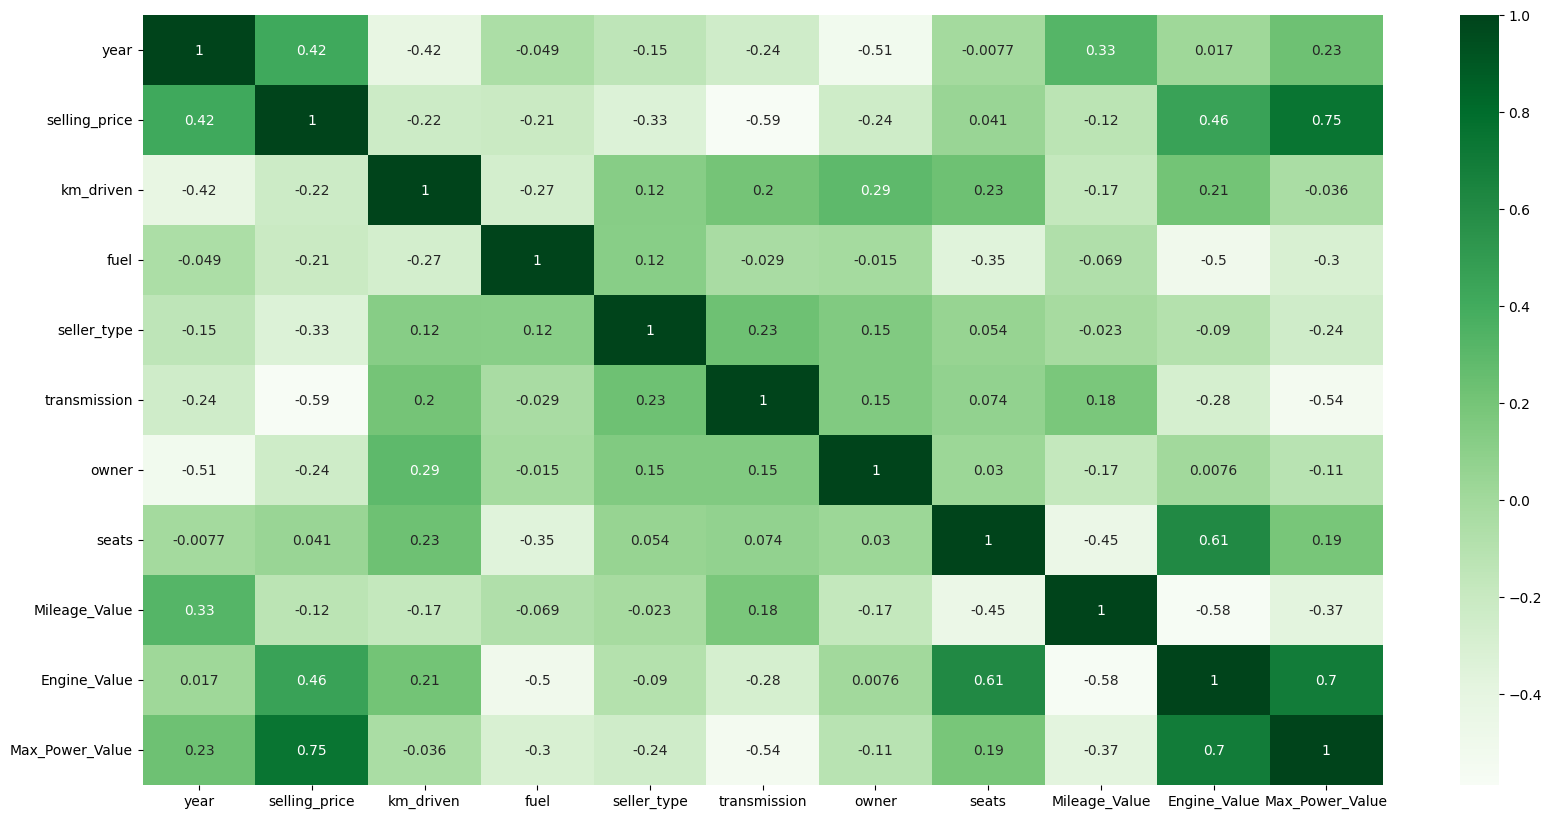

In [48]:
# Heat map
plt.figure(figsize = (20,10))
sns.heatmap(sorted_new_df.corr(), annot = True, cmap = "Greens")

<Axes: xlabel='x', ylabel='y'>

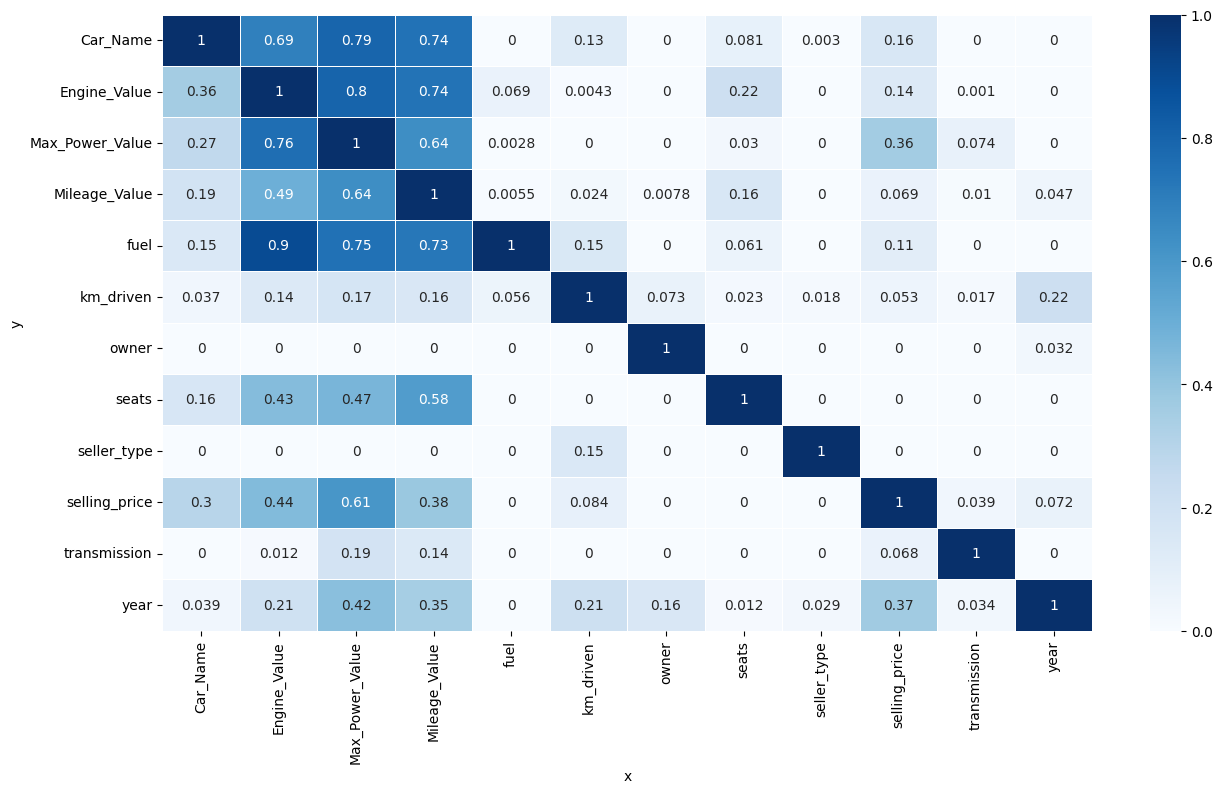

In [49]:
#Actual Prediction
dfcopy = sorted_new_df.copy()
dfcopy.drop(['Car_Name', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(sorted_new_df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 4 Feature Selection

From HeatMap shows that there have correlate between Mileage_Value,km_driven and Max_Power_Value

In [50]:
X = new_df[['km_driven','Max_Power_Value', 'Mileage_Value']]

In [51]:
#Selling Price has high number must use log to transform
y = np.log(new_df['selling_price'])

In [52]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 5. Preprocessing

### Null values

In [53]:
#check for null values
X_train.isna().sum()

km_driven            0
Max_Power_Value    149
Mileage_Value      154
dtype: int64

In [54]:
X_test.isna().sum()

km_driven           0
Max_Power_Value    59
Mileage_Value      60
dtype: int64

In [55]:
y_train.isna().sum()

0

In [56]:
y_test.isna().sum()

0

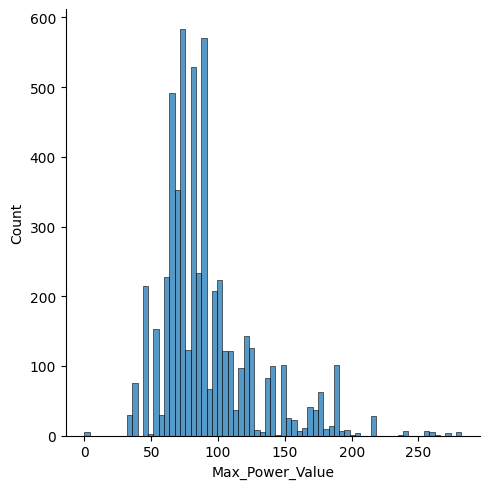

In [57]:
# Check distribution of max_power
sns.displot(data=X_train, x= 'Max_Power_Value')

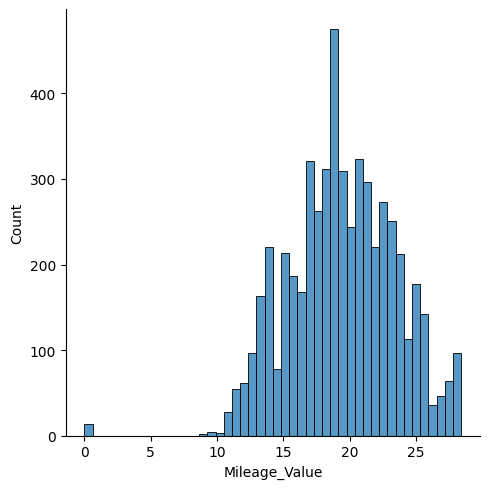

In [58]:
#Check distribution of mileage
sns.displot(data=X_train, x = 'Mileage_Value')

According from Max_Power_Value graph and Mileage_Value graph show that the Mileage_Value graph shape looks like Normal Distribution but the Max_Power_Value is not. To sum up, it can use Means for mileages and Median for Max_Power

In [59]:
X_train['Mileage_Value']

6853    13.58
1495    15.96
7904    20.77
1281    18.80
1421    23.00
        ...  
5293    20.36
5461    20.51
865     20.77
7701    22.37
7366    21.40
Name: Mileage_Value, Length: 5619, dtype: float64

In [60]:
# Fill training set 
X_train['Max_Power_Value'].fillna(X_train['Max_Power_Value'].median(), inplace=True)
X_train['Mileage_Value'].fillna(X_train['Mileage_Value'].mean(), inplace=True)

In [61]:
# Fill testing set 
X_test['Max_Power_Value'].fillna(X_train['Max_Power_Value'].median(), inplace=True)
X_test['Mileage_Value'].fillna(X_train['Mileage_Value'].mean(), inplace=True)

In [62]:
X_train.isnull().sum()

km_driven          0
Max_Power_Value    0
Mileage_Value      0
dtype: int64

In [63]:
X_test.isnull().sum()

km_driven          0
Max_Power_Value    0
Mileage_Value      0
dtype: int64

<Axes: xlabel='Mileage_Value'>

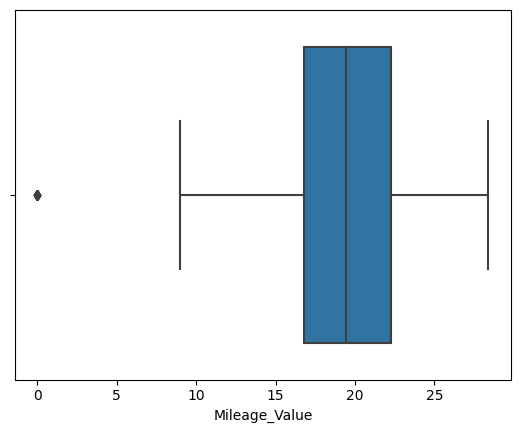

In [64]:
#Checking Outlier
sns.boxplot(data = X_train, x = 'Mileage_Value')

In [65]:
# Check which row in train_set has mileage lower than 5
X_train[X_train['Mileage_Value']<5]

,km_driven,Max_Power_Value,Mileage_Value
6629,80000,70.00,0.0
7337,60000,194.00,0.0
644,28900,65.00,0.0
5900,5000,70.00,0.0
785,90000,62.00,0.0
1649,128000,62.00,0.0
7002,80000,62.10,0.0
5846,28100,103.25,0.0
2137,64788,115.00,0.0
1676,110000,165.00,0.0


<Axes: xlabel='Max_Power_Value'>

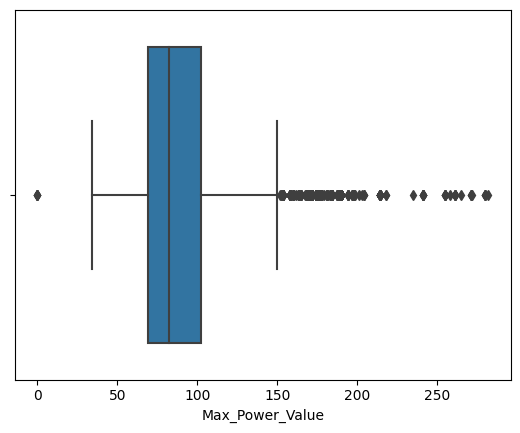

In [66]:
sns.boxplot(data = X_train, x = 'Max_Power_Value')

In [67]:
#Check Shape
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## 6 Model Selection

In [68]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.26315301766345234
r2:  0.625983597842372


In [69]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 3.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [70]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), Ridge(), Lasso(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0), XGBRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "Ridge", "Lasso", "SVR", "KNeighbors Regressor", 
                   "Decision-Tree Regressor", "Random-Forest Regressor","XGBRegressor"]

In [71]:
y_train.isna().sum()

0

In [72]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.2819343  -0.27076652 -0.33381085 -0.25299776 -0.2832395 ]; Mean: -0.2845497873545983
Ridge - Score: [-0.3008402  -0.27657946 -0.26256865 -0.27293411 -0.31074482]; Mean: -0.2847334472698452
Lasso - Score: [-0.31075232 -0.326715   -0.30353133 -0.29469102 -0.36097943]; Mean: -0.319333820239169
SVR - Score: [-0.6473764  -0.58220986 -0.60572518 -0.63040219 -0.58130003]; Mean: -0.6094027306671753
KNeighbors Regressor - Score: [-0.29067241 -0.28922411 -0.28451327 -0.29166337 -0.27865017]; Mean: -0.286944664436095
Decision-Tree Regressor - Score: [-0.12220966 -0.1456314  -0.15453485 -0.15530012 -0.13000268]; Mean: -0.14153574338749367
Random-Forest Regressor - Score: [-0.10017168 -0.11079549 -0.10042676 -0.09188223 -0.10497364]; Mean: -0.10164996241448612
XGBRegressor - Score: [-0.08172763 -0.09870774 -0.11270059 -0.08465995 -0.08907869]; Mean: -0.0933749191456962


The result shows that XGBRegressor has the best accuracy compare with other model.
Use iterating to find best parameter

max_depth : [5, 10, 15]

learning_rate : [0.01, 0.02, 0.05, 0.10]

n_estimators : [200, 300, 400, 500, 600]

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15], 'learning_rate': [0.01, 0.02, 0.05, 0.1],
              'n_estimators': [200, 300, 400, 500, 600]}

rf = XGBRegressor(random_state = 10)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);

In [74]:
grid.best_params_

{'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 600}

In [75]:
# Find my grid_search's best score
best_mse = grid.best_score_

In [76]:
best_mse# ignore the minus because it's neg_mean_squared_error

-0.09180027749345236

## 7 Testing

In [77]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.08718867803933093

## 8. Analysis: Feature Importance

In [78]:
rf = grid.best_estimator_

rf.feature_importances_

array([0.06554107, 0.7851389 , 0.14932005], dtype=float32)

Text(0.5, 0, 'Random Forest Feature Importance')

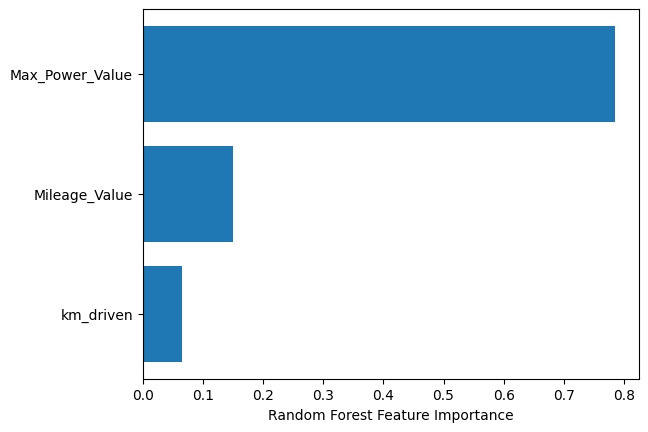

In [79]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## 9. Inference (editing)

In [80]:
import pickle

# save the model to disk
filename = '124022 car_prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [81]:
# load the model from disk to test
loaded_model = pickle.load(open(filename, 'rb'))

In [82]:
new_df[["Max_Power_Value","Mileage_Value","km_driven","selling_price"]].loc[15]

Max_Power_Value        82.00
Mileage_Value          18.15
km_driven           40000.00
selling_price      400000.00
Name: 15, dtype: float64

In [83]:
sample = np.array([[50, 10.25, 271.3494]])

In [84]:
predicted_life_exp = loaded_model.predict(sample)
predicted_life_exp

array([11.844723], dtype=float32)

## Summary

To sum up, According from the test in 6.Model Selection shows the result of statistic test methods between Linear Regression, Ridge, Lasso, SVR, KNeighbors Regressor, Decision-Tree Regressor, Random-Forest Regressor and XGBRegressor found that XGBRegressor perform the best prediction compare to the other by having R-Square around 0.9 means that can use as the prediction.

Max Power have the strongest correlated to selling price from the result of correlation heatmap.